# Product Recomandation System

### Description of the project
- #### Project is to implemet product recommandation system personalized to user
- #### Implementing this system will suggest the product, that customer most likely to buy.
- #### This system can be integrated with web backend to dynamically display the products. 
- #### This kind of systems are being used by internet giants Amazon, Netflix, ebay, etc.

### Description of the Dataset source
- #### For the learning purposes, data has been retrived from AMAZON.
- #### Dataset coontains product ratings of the <b> beauty products </b>.
- #### Dataset Contains 4 Variables:
    1. <b> UserId </b>: Unique Id of the user, it is hashed id for security purposes (total unique users: 1210271)
    2. <b> ProductId </b>: Unique Id of the Product, it is hashed id for security purposes (total unique products: 249274)
    3. <b> Ratings </b>: Rating of the product given by particular User (Value 1 to 5)
    4. <b> Timestamp </b>: Unix values of Timestamps that describes the time at which user rated the product

## Importing and pre-processing data

### 1. Import data
- SourseFile Name: "ratings_beauty.csv"
- We will use Pandas library to import the data and create pandas DataFrame

In [1]:
# import pandas
import pandas as pd

#crate data frame and import File in dataframe df
df = pd.read_csv("ratings_beauty.csv")

#print first 10 observation from the dataset
df.head(10)


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


### Futher description and charts are in exploratory data analysis files including SAS programs and Tableau files. Attached Separately with this file.

### Data Cleaning And Sampling

- There is no null values in the dataset so we wont need to handle it.

#### The dataset has ratings from start of 1996 - end of 2014 : For our purpose let us take recent data of 2 years 2013 and 2014.
- We can achieve this using Timestamp.
- First derive unix time stamp of "1st January, 2013", then delete all the obsevation which has time stamps below that value

In [2]:
# Deriving time stamo of 1st January, 2013
import datetime

date_string = "01/01/2013"
date = datetime.datetime.strptime(date_string, "%m/%d/%Y")
timestamp = datetime.datetime.timestamp(date)

print("TimeStamp of 1st Jan, 2013 is " + str(timestamp))

print("Number of Observation before deletion:" + str(df.shape[0]))
# Deleting Observation before 2013

df = df.sort_values(by=['Timestamp'])
df = df[df["Timestamp"] > timestamp]

print("Number of Observation After deletion:" + str(df.shape[0]))

TimeStamp of 1st Jan, 2013 is 1357016400.0
Number of Observation before deletion:2023070
Number of Observation After deletion:1409648


#### We will not need variable Timestamp for further Analysis: Deleting the Timestamp variable

In [3]:
df = df.iloc[:,:3]
df.head()

,UserId,ProductId,Rating
1072651,A3OXIAKAOKF76W,B003N21PX8,3.0
695195,AJD0M6CES2VQH,B001FXF6CS,5.0
1189564,A2VTQD9N4IE92U,B0049NEBEA,2.0
1347537,A2EOYTHNS5J5RB,B0051T94K2,5.0
704724,A16VDZICXGCKKU,B001GIOW36,5.0


#### Sampling process
- currently we have nearly 1.5 million observations in the dataframe
- It would not be feasible to create a deep learning model with that amount of data using single machine.
- We will consider 100k observations for this project.

#### We will consider 2 criteria for sampling
1. Include users who has rated more products Comperatively
2. Include Products which has been rated comparetively more number of time.

#### After trying sevaral combinations We came up with process flow that will create good quality sample, that will be efficient for training the model

In [4]:
# First we will sort the data based on frequency of the users, and will take top 300k Observation

# create a (sorted) data frame that lists the customers with their number of occurrences
count_df = pd.DataFrame(df.UserId.value_counts()) 

# join the count data frame back with the original data frame
new_index = count_df.merge(df[["UserId"]], left_index=True, right_on="UserId") 

# output the original data frame in the order of the new index.
df = df.reindex(new_index.index).head(200000) 


#Now we will sort the data based on frequency of the Products, then we will take top 100k observation

# create a (sorted) data frame that lists the customers with their number of occurrences
count_df = pd.DataFrame(df.ProductId.value_counts()) 

# join the count data frame back with the original data frame
new_index = count_df.merge(df[["ProductId"]], left_index=True, right_on="ProductId") 

# output the original data frame in the order of the new index.
data = df.reindex(new_index.index).head(100000) 


data.shape

(100000, 3)

#### Data Transformation: Encoding UserId and ProductId to integers.
- In our current dataframe, UserId and ProductId are stored as charecter strings. It will be hard to use them directly. Let us encode into integer numbers, That will make them easy to use and it will also be helpful as wew go further.

In [5]:
print("Before encodeing")
print(data.head())



from sklearn.preprocessing import LabelEncoder

#Encoding User ids
labelEncoder_Uid = LabelEncoder()
data["UserId"] = labelEncoder_Uid.fit_transform(data.iloc[:,0])

#Encoding Product ids
labelEncoder_Pid = LabelEncoder()
data["ProductId"] = labelEncoder_Pid.fit_transform(data.iloc[:,1])


print("After Encoding")
print(data.head())

Before encodeing
                 UserId   ProductId  Rating
1279792  A3TYR1ALBZ2EU9  B004OHQR1Q     4.0
1279397  A2065HBMYDXJ1S  B004OHQR1Q     5.0
1279063   ANXT431V3MW4Z  B004OHQR1Q     5.0
1280299  A11I1I9QLMAM1A  B004OHQR1Q     5.0
1279938  A2F4FJ3BIZ68GJ  B004OHQR1Q     5.0
After Encoding
         UserId  ProductId  Rating
1279792   11947       3060     4.0
1279397    4216       3060     5.0
1279063   14553       3060     5.0
1280299     195       3060     5.0
1279938    6023       3060     5.0


#### Storing the processed data in new file
- Just in case of any unfortunate condition, storing the processeds and sampled data into new file

In [6]:
data.to_csv("Sampled_rating_Beauty.csv")

## Product Recommendation System: New Users
- When new user enters the website, we do not have any data on the user to show personalize recommendation
- Most simple way to recommend product to new user is to show them most populer products.
- We can derive most populer products by finding products that has been rated most number of time.
- If we want to take it further, after finding 100 most number of time rated products, we can remove products with average raing less than 3.0

#### Let us build the simple recommender system based on Popularity of the product

In [7]:
#dataframe including product id and rating counts
pop_count = pd.DataFrame(data.groupby('ProductId')['Rating'].count())

#dataframe including product id and avearage rating
pop_aveg = pd.DataFrame(data.groupby('ProductId')['Rating'].mean())
#pop = pop.groupby('ProductId')['Rating'].mean()

# Merging both the dataframes in to one
pop = pd.merge(pop_count, pop_aveg, on ='ProductId')

#top 100 product with highest counts
pop = pop.sort_values(by='Rating_x', ascending=False).head(100)

#filtering top 100 and removing products with average rating less than 3.0
pop = pop[pop["Rating_y"] >= 3.0]

#### Top 20 populer products

In [8]:
pop.iloc[:20, 1]

ProductId
3060    4.627820
3678    4.063830
1053    4.274775
4391    4.412037
3958    3.893720
1184    4.610837
3741    4.232673
2682    4.302083
3332    4.147541
4521    3.971910
4728    4.158192
3326    4.445714
133     4.526316
4522    4.467836
4691    4.125000
4392    4.222930
4630    4.458065
4775    4.361290
2007    4.353333
3210    3.586207
Name: Rating_y, dtype: float64

## Product Recommender system: Old Users
- Old users means we have data on them
- We can levarage this data to Predict which Product current user will like.

### Approach: Collaborative Filtering using Auto Encoder
- #### We will be using collaborative filtering approach. 
    - Explaination: The model will compare the past choices of current Customer with all other Customer and it will find the customers with simmiler choices.
    - Current Customer is B, and let say Customer A and Customer B has simmilar taste in product. Now model will check Which products Customer A has bought in past and costomer B haven't seen it? Then model will show such products to customer B.
    - Autoencoder is unsupervised model, It will make features by its own. It can make features based on different aspects such as: 
        1. comparing customers as we discussed above
        2. Associan of product with other products
        3. Pattern of user liking different products etc.
    
- #### Auto Encoder:
    - Auto Encoder algorith is Unsupervised Directed Graph Neural Network. These are most advance algorithms in current Data Science field.
    - Auto Encoders are majorly being  used in Image compression, Image Processing, Video Processing etc. But we will use to find patterns and recommend the product. 
    - Auto Encoder recretes the original input. That will help us predicting Ratings that user might give to a product based on other users and customer preferences.
- #### Library
    - We will be using Pytorch library to create our Auto Encoder Structure

In [9]:
#Importing Necessory Libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

### Data Transformation
- We will have to transform our data into particuler format to feed it to the model
- Final data will be 2D matrix UserId as rows and ProductId as column, filled with ratings

#### Split Data into Training set and Test set
- Test set will be help us validating the accuracy of our model

In [10]:
#Splitting data into Training set and test set.

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

train = np.array(train, dtype = 'int')
test = np.array(test, dtype = 'int')


In [11]:
#Getting the number of users and number of products to create final matrix
nb_user = max(max(train[:,0]), max(test[:,0]))
nb_product = max(max(train[:,1]), max(test[:,1]))

In [12]:
# Creatin final maxrtix
# Users in rows and Products in Columns, Filled with ratings
# If user has not rated the product, rating will be 0 (Zero)
# Creating a list of list here; It will be easier to feed it to pytorch tensor

def convert(data):
    new_data = []
    
    for id_user in range(nb_user):
        id_product = data[:,1][data[:,0] == id_user]
        id_ratings = data[:,2][data[:,0] == id_user]
        ratings = np.zeros(nb_product)
        
        ratings[id_product -1] = id_ratings
        
        new_data.append(list(ratings))
    return new_data


training_set = convert(train)
test_set = convert(test)

In [14]:
#Coverting Lists into PyTorch Tensors. Pytorch framework uses pytorch tensors simmilar to numpy arrays but PyTorch works efficiently in parallel Computation

training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

- After Transformation our data look like 2 dimensional Array in below

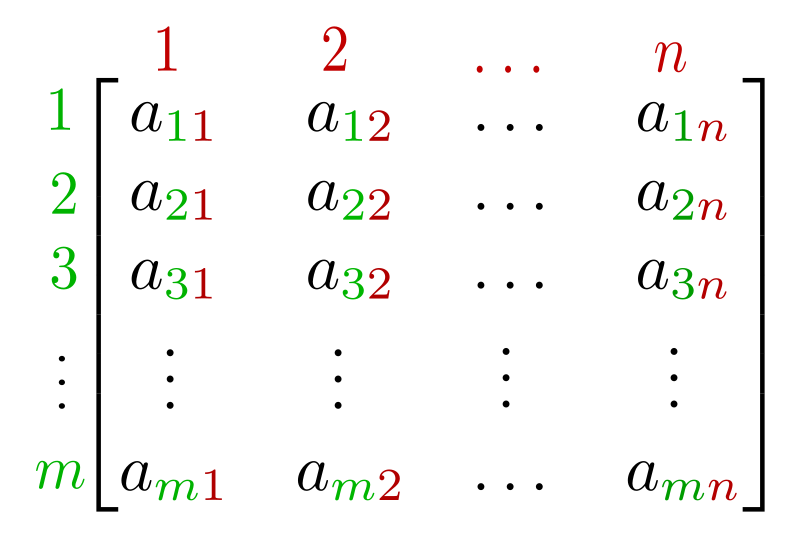

- Here, Column numbers are our Product Ids and rows are User id. Data filled inside are ratings.
- This is easiest way to map products rated by users.

### Constructing Auto Encoder
- We will use auto encoder as our predictive algorithm
- Auto encoders are Unsupervised Directed Neural Networks consist of 3 Section
    1. Encoder: This Section Compresses the data
    2. Bottleneck: This section work as joint btween Encoder and Decoder
    3. Decoder: This section decodes the data. Normalyy it is Mirrored version of Encoder
    
#### Below is the construction architecture of Auto Encoder
- Each Circle known as Neuron, it consists Activation function in it
- Each Node or line contains different weights 
- While training this weights get adjusted to minimize the error

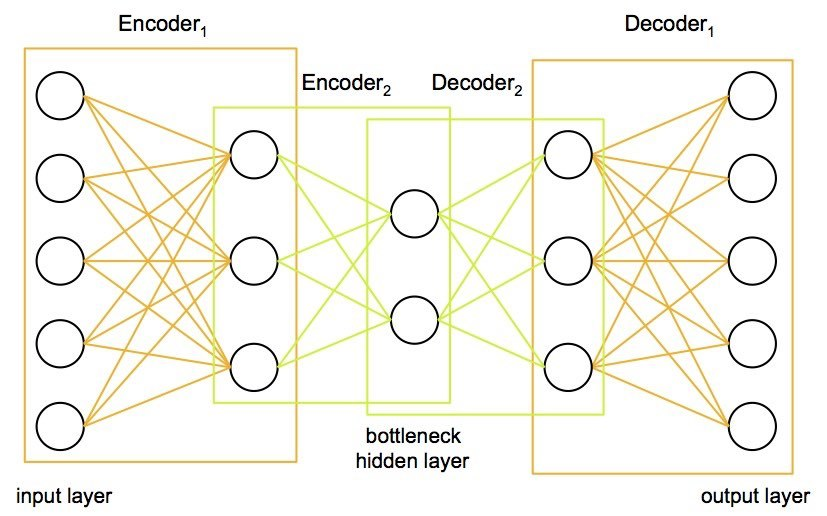

#### In our structure, we will have 7 layers of neurons.
    1. Encoder: 
        - Layer 1: number of neurons = number of products in database (Input Layer)
        - Layer 2: 100 neurons
        - Layer 3: 50 Neurons
    2. Bottleneck:
        - Layer 4: 20 Neurons
    3. Decoder:
        - Layer 5: 50 Neurons
        - Layer 6: 100 neurons
        - Layer 7: number of neurons = number of products in database (Output Layer)
        

In [30]:
# Creating Architecture of the Auto Encoder.
class SAE(nn.Module):
    def __init__(self, ):
        super(SAE, self).__init__()
        self.fc1 = nn.Linear(nb_product, 100)
        self.fc2 = nn.Linear(100,50)
        self.fc3 = nn.Linear(50, 20)
        self.fc4 = nn.Linear(20, 50)
        self.fc5 = nn.Linear(50,100)
        self.fc6 = nn.Linear(100, nb_product)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        #x = self.activation(self.fc3(x))
        #x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = self.fc6(x)
        return x

#### Now, we will assign the Error function we want to use and Optimization Function 
- We will use MeanSquareError Loss as our error function
- we will use Gradient decent to optimize our Algorithm.
- Learning rate of GD will be 0.01.

In [31]:
sae = SAE()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(sae.parameters(), lr = 0.005, weight_decay = 0.5)

### Training the Model

In [32]:
nb_epoch = 10

In [33]:
for epoch in range(1,nb_epoch+1):
    train_loss = 0
    s = 0.
    for user in range(nb_user):
        input = Variable(training_set[user]).unsqueeze(0)
        target = input.clone()

        if torch.sum(target.data > 0) > 0:
            output = sae(input)
            target.required_grad = False
            output[target == 0] = 0
            loss = criterion(output, target)
            mean_correcter = nb_product/float(torch.sum(target.data > 0) + 1e-10)

            #Initiating Back Propogation
            loss.backward()

            #adjusting Train loss
            train_loss += np.sqrt(loss.data*mean_correcter)

            #increamenting s
            s += 1.

            #optimising and updating weights
            optimizer.step()

    print("Epoch:" + str(epoch) + "     loss:"+ str(train_loss/s))

Epoch:1     loss:tensor(3.1151)
Epoch:2     loss:tensor(1.8158)
Epoch:3     loss:tensor(1.3847)
Epoch:4     loss:tensor(1.1986)
Epoch:5     loss:tensor(1.1114)
Epoch:6     loss:tensor(1.0680)
Epoch:7     loss:tensor(1.0454)
Epoch:8     loss:tensor(1.0333)
Epoch:9     loss:tensor(1.0264)
Epoch:10     loss:tensor(1.0223)


### Testing the Model

In [35]:
test_loss = 0
s = 0.
for user in range(nb_user):
        input = Variable(training_set[user]).unsqueeze(0)
        target = Variable(test_set[user])

        if torch.sum(target.data > 0) > 0:
            output = sae(input)
            target.required_grad = False
            output[(target == 0).unsqueeze(0)] = 0
            loss = criterion(output, target)
            mean_correcter = nb_product/float(torch.sum(target.data > 0) + 1e-10)

            #adjusting Test loss
            test_loss += np.sqrt(loss.data*mean_correcter)

            #increamenting s
            s += 1.

print("Test_loss:"+ str(test_loss/s))

C:\Users\baps\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([5762])) that is different to the input size (torch.Size([1, 5762])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test_loss:tensor(0.9720)


#### The Average Training Loss and Test loss is less than 1. That indicates the accuracy of our model. The loss of 1 means model can predict the actual answer with the error of plu or minus 1 star.

### Saving the model and states

In [49]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in sae.state_dict():
    print(param_tensor, "\t", sae.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
fc1.weight 	 torch.Size([100, 5762])
fc1.bias 	 torch.Size([100])
fc2.weight 	 torch.Size([50, 100])
fc2.bias 	 torch.Size([50])
fc3.weight 	 torch.Size([20, 50])
fc3.bias 	 torch.Size([20])
fc4.weight 	 torch.Size([50, 20])
fc4.bias 	 torch.Size([50])
fc5.weight 	 torch.Size([100, 50])
fc5.bias 	 torch.Size([100])
fc6.weight 	 torch.Size([5762, 100])
fc6.bias 	 torch.Size([5762])
Optimizer's state_dict:
state 	 {0: {'step': 155340, 'square_avg': tensor([[1.5625e-06, 1.5625e-06, 1.5625e-06,  ..., 1.5625e-06, 1.5625e-06,
         1.5625e-06],
        [1.5625e-06, 1.5625e-06, 1.5625e-06,  ..., 1.5625e-06, 1.5625e-06,
         1.5625e-06],
        [1.5625e-06, 1.5625e-06, 1.5625e-06,  ..., 1.5625e-06, 1.5625e-06,
         1.5625e-06],
        ...,
        [1.5625e-06, 1.5625e-06, 1.5625e-06,  ..., 1.5625e-06, 1.5625e-06,
         1.5625e-06],
        [1.5625e-06, 1.5625e-06, 1.5625e-06,  ..., 1.5625e-06, 1.5625e-06,
         1.5625e-06],
        [1.5625e-06, 1.5625e-06

In [50]:
torch.save(sae.state_dict(),"ProductRecommenderState.pt")

In [52]:
torch.save(sae,"ProductRecommenderModel.pt")

#### As output, we get an array of size nb_produtcs  ( Total number of products), containing predicted ratings for the products that were not rated by the user. We can then sort it to get the top rated product ids
- Let us check top 20 products with highest predicted ratings for user ID 1000

In [67]:
# getting the outputs from the model
input = Variable(training_set[1000]).unsqueeze(0)
output = sae(input)

In [68]:
# Converting into list, makes it easy for sorting and indexing operations
input = list(input[0])
output = list(output[0])

In [70]:
# Sorting the list and getting top 20 produucts
index_list = sorted(range(len(output)), key=lambda i: output[i], reverse=True)[:20]

- Importing saved model and making the predictions for same user, to compare if saved model is working same as current states

In [72]:

model = torch.load("ProductRecommenderModel.pt")
model.eval()

SAE(
  (fc1): Linear(in_features=5762, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=100, bias=True)
  (fc6): Linear(in_features=100, out_features=5762, bias=True)
  (activation): Sigmoid()
)

In [74]:

input = Variable(training_set[1000]).unsqueeze(0)
output = model(input)

In [76]:
print(index_list)
output = list(output[0])
print(sorted(range(len(output)), key=lambda i: output[i], reverse=True)[:20])

[5591, 1117, 2274, 5173, 4837, 165, 5040, 1722, 5518, 1083, 1357, 5343, 267, 584, 5570, 4537, 2945, 910, 1194, 5638]
[5591, 1117, 2274, 5173, 4837, 165, 5040, 1722, 5518, 1083, 1357, 5343, 267, 584, 5570, 4537, 2945, 910, 1194, 5638]


#### As we can see, current SAE class and saved model is performing the same, which means we can use that model into Production, connet it with backend and have our top predicted products that user might like and more likely to purchase.